# Load packages

In [31]:
#from google.colab import drive
#drive.mount('/content/gdrive')
install.packages('reshape2')
install.packages("tidyverse")
library(tidyverse)
library(tidyr)
library(ggplot2)
library(dplyr)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Import datasets

### Polarization data

   Spectrum                         Label 1974 2022
1      -100              .i: Inapplicable    0    1
2       -99                 .n: No answer    4   27
3       -98 .d: Do not Know/Cannot Choose   70   73
4       -97            .s: Skipped on Web    0   17
5         1             Extremely liberal   22  192
6         2                       Liberal  201  486
7         3              Slightly liberal  207  400
8         4  Moderate, middle of the road  564 1245
9         5         Slightly conservative  221  430
10        6                  Conservative  160  514
11        7        Extremely conservative   35  159
12       NA                                 NA   NA
13       NA                                 NA   NA


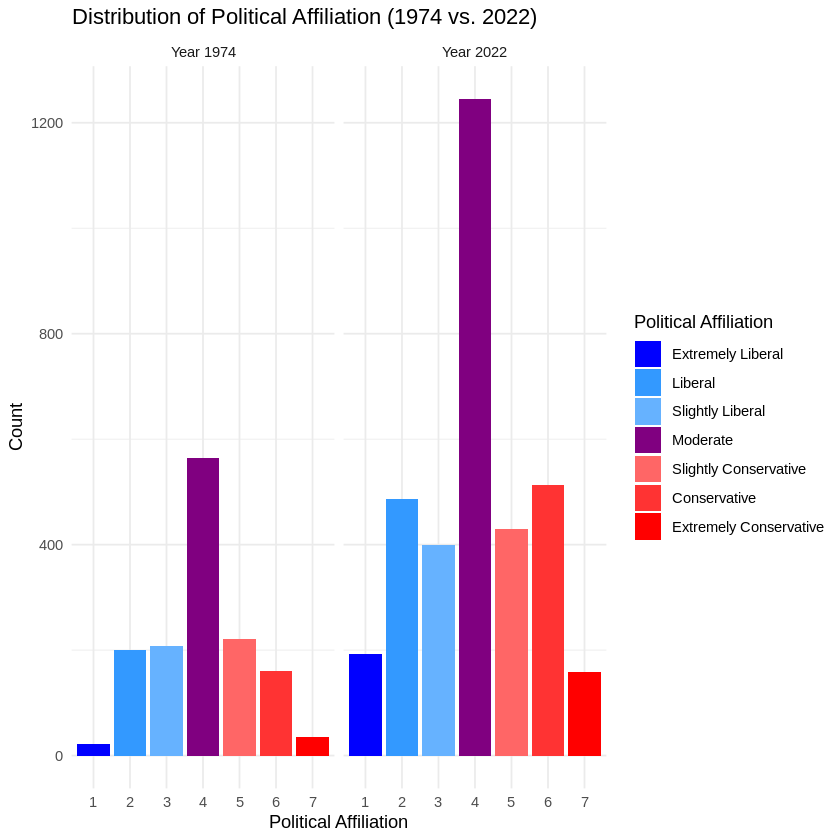

In [35]:
# This is the URL that will lead you to where the datafile lives on GitHub
url <- "https://raw.githubusercontent.com/ceelkamalayko/API201DFinalExercise/main/GSSdata.csv"
data <- read.csv(url)
####### Data cleaning######
# To avoid recurring errors, we update column names
colnames(data) <- c("Spectrum", "Label", "1974", "1975", "1976", "1977", "1978", "1980", "1982", "1983", "1984", "1985", "1986", "1987", "1988", "1989", "1990", "1991", "1993", "1994", "1996", "1998", "2000", "2002", "2004", "2006", "2008", "2010", "2012", "2014", "2016", "2018", "2021", "2022")
# Let us now subset the data for 1974 and 2022 so that we can focus on 1974 and 2022
cleaned_data <- data[, c("Spectrum", "Label", "1974", "2022")]
# print the post-subsetted clean data
print(cleaned_data)

#After subsetting the data, we need to filter so that we can focus on 1 to 7 as opposed to -99 which is irrelevant for our research

# This filters the data for political views 1 to 7
filteredata <- cleaned_data[cleaned_data$Spectrum %in% c(1, 2, 3, 4, 5, 6, 7), ]
# To plot readily, we pivot the data
ready_data <- pivot_longer(filteredata, cols = c("1974", "2022"), names_to = "Year", values_to = "Count")

# Generating Histograms
ggplot(ready_data, aes(x = factor(Spectrum), y = Count, fill = factor(Spectrum))) +
  geom_bar(position = "dodge", stat = "identity") +
  facet_wrap(~ Year, scales = "free_x", labeller = labeller(Year = c("1974" = "Year 1974", "2022" = "Year 2022"))) +
  labs(title = "Distribution of Political Affiliation (1974 vs. 2022)",
       x = "Political Affiliation",
       y = "Count") +
  scale_x_discrete(labels = c("1", "2", "3", "4", "5", "6", "7")) +
  scale_fill_manual(values = c("1" = "#0000FF", "2" = "#3399FF", "3" = "#66B2FF", "4" = "#800080", "5" = "#FF6666", "6" = "#FF3333", "7" = "#FF0000"),
                    name = "Political Affiliation",
                    labels = c("1" = "Extremely Liberal", "2" = "Liberal", "3" = "Slightly Liberal",
                               "4" = "Moderate", "5" = "Slightly Conservative", "6" = "Conservative",
                               "7" = "Extremely Conservative")) +
  theme_minimal()



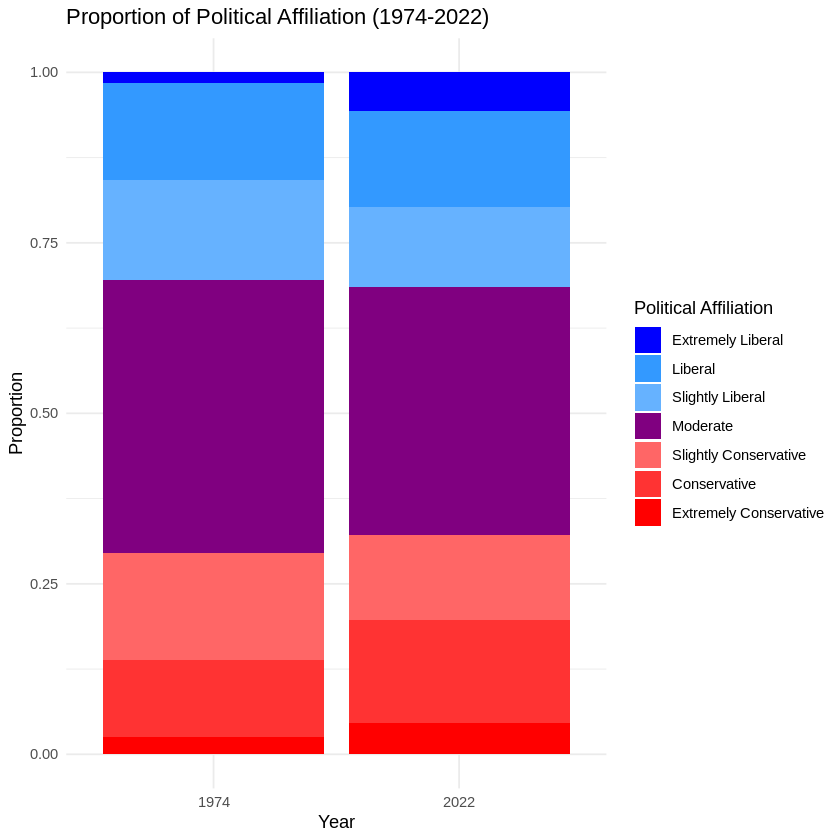

In [36]:
# Determining the proportion in each year after grouping
ready_data <- ready_data %>%
  group_by(Year) %>%
  mutate(Proportion = Count / sum(Count))

# Stacked Bar Chart
ggplot(ready_data, aes(x = factor(Year), y = Proportion, fill = factor(Spectrum))) +
  geom_bar(position = "stack", stat = "identity") +
  labs(title = "Proportion of Political Affiliation (1974-2022)",
       x = "Year",
       y = "Proportion") +
  scale_fill_manual(values = c("1" = "#0000FF", "2" = "#3399FF", "3" = "#66B2FF", "4" = "#800080", "5" = "#FF6666", "6" = "#FF3333", "7" = "#FF0000"),
                    name = "Political Affiliation",
                    labels = c("1" = "Extremely Liberal", "2" = "Liberal", "3" = "Slightly Liberal",
                               "4" = "Moderate", "5" = "Slightly Conservative", "6" = "Conservative",
                               "7" = "Extremely Conservative")) +
  theme_minimal()

In [ ]:
df_partyidentification <- read.csv('https://raw.githubusercontent.com/LucasLMS9/API201DFinalExercise/main/Party%20identification%20among%20registered%20voters%201994-2019%20(Detailed%20Tables)%20-%20White%2C%20non-Hispanic.csv')
head(df_partyidentification)

,Among.white.registered.voters,X,X.1,X.2,X.3,X.4,X.5
,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>
1,,,,,NA,,
2,,% who identify as ...,,,NA,% who identify as/lean toward ...,
3,Year,Republican,Democrat,Independent,NA,Rep/Lean Rep,Dem/Lean Dem
4,1994,36,29,31,NA,51,39
5,1995,36,29,31,NA,52,41
6,1996,36,30,30,NA,49,44


### Social media usage data

In [ ]:
df_techusage <- read.csv('https://raw.githubusercontent.com/LucasLMS9/API201DFinalExercise/main/technology-adoption-by-households-in-the-united-states%20(1).csv')
head(df_techusage)

,Entity,Code,Year,Technology.Diffusion..Comin.and.Hobijn..2004..and.others.
,<chr>,<lgl>,<int>,<dbl>
1,Amazon Prime users,NA,2014,11.13
2,Amazon Prime users,NA,2015,17.09
3,Amazon Prime users,NA,2016,24.58
4,Amazon Prime users,NA,2017,32.51
5,Amazon Prime users,NA,2018,36.58
6,Automatic transmission,NA,1910,0.00


In [ ]:
#Rename variables in df_techusage

colnames(df_techusage)[colnames(df_techusage) == "Technology.Diffusion..Comin.and.Hobijn..2004..and.others."] <- "Usage"
head(df_techusage)


,Entity,Code,Year,Usage
,<chr>,<lgl>,<int>,<dbl>
1,Amazon Prime users,NA,2014,11.13
2,Amazon Prime users,NA,2015,17.09
3,Amazon Prime users,NA,2016,24.58
4,Amazon Prime users,NA,2017,32.51
5,Amazon Prime users,NA,2018,36.58
6,Automatic transmission,NA,1910,0.00


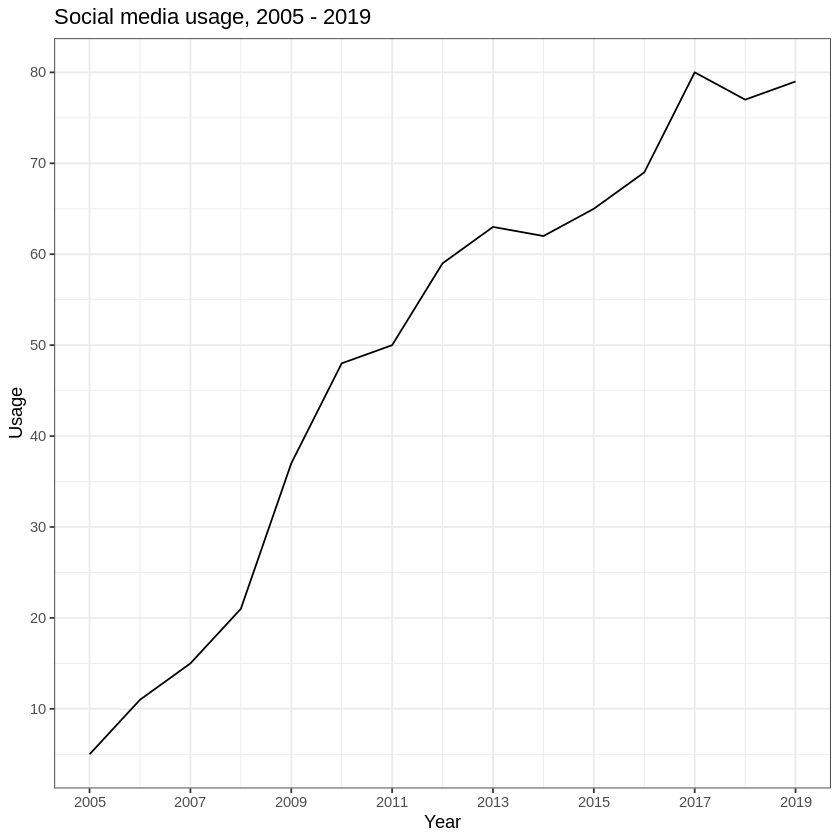

In [ ]:
#Line chart of social media usage (Isabel's chart for P-Set 10)

df_techusage %>%
  filter(Entity == "Social media usage") %>%
  ggplot(aes(x = Year, y = Usage)) +
  geom_line() +
    labs(title = "Social media usage, 2005 - 2019") +
    scale_y_continuous(breaks = c(0,10,20,30,40,50,60,70,80,90,100)) +
      scale_x_continuous(breaks = c(2005, 2007, 2009, 2011, 2013, 2015, 2017, 2019)) +
      theme_bw()


# Part I: Regression analysis


## Part I.A. Discussion

## Part I.B. Further analysis